# How to Determine the Min, Mean and Max Inputs from Limited Samples
 - Used the example from: <br> Murtha, J. and Ross, J., 2009, Uncertainty and the volumetric equation, Journal of Petroleum Technology, Guest Editorial, September 2009 

## Import Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14}) # Global command must set in top

## Set up Descriptive Statistics Function

In [37]:
# Create a function to do descriptive statistics
def my_stats(var):
    import numpy as np
    from scipy.stats import skew
    from scipy.stats import kurtosis
    from scipy import stats
    print('Descriptive Statistics')
    print('mean:   ','{: .4f}'.format(np.mean(var)))
    print('sem:    ','{: .4f}'.format(stats.sem(var)))
    print('median: ','{: .4f}'.format(np.median(var)))
    print('min:    ','{: .4f}'.format(np.min(var)))
    print('max:    ','{: .4f}'.format(np.max(var)))
    print('stdev:  ','{: .4f}'.format(np.std(var)))
    print('skew:   ','{: .4f}'.format(skew(var)))
    print('kurt:   ','{: .4f}'.format(kurtosis(var)))
    print('p05:    ','{: .4f}'.format(np.percentile(var,5)))
    print('p50:    ','{: .4f}'.format(np.percentile(var,50)))
    print('p95:    ','{: .4f}'.format(np.percentile(var,95)))
    print('Count   ','{: .0f}'.format(np.size(var)))

## Data (From Murtha and Ross, 2009)

In [304]:
# Reservoir height data from Murtha and Ross (2009)
x=[42,71,68,129,54,48,111,54,112,120,11,106,63,61,145,134,102,165,72,68,101,32,54,33]

print("Raw Data")
my_stats(x)

Raw Data
Descriptive Statistics
mean:     81.5000
sem:      8.1596
median:   69.5000
min:      11.0000
max:      165.0000
stdev:    39.1323
skew:     0.3217
kurt:    -0.7951
p05:      32.1500
p50:      69.5000
p95:      143.3500
Count     24


## Determine the Min and Max from Data, Two Approaches:
- <u>1) **90% Confidence Limits using Student's t-Statistic**</u>
- = Mean +/- SEM * t-statistic
- Students t-statistic table: https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
- see Sykes, M.A., Welsh, M.B,, and Begg, S.H., 2011, <br>Don’t drop the anchor: recognizing and mitigating human factors when making assessment judgments under uncertainty, SPE 	146230, p. 1-15	https://www.researchgate.net/publication/241789883_Don't_Drop_the_Anchor_Recognizing_and_Mitigating_Human_Factors_When_Making_Assessment_Judgments_Under_Uncertainty


- <u>2) **3 * Standard Error of the Mean**</u>
- Murtha, J. and Ross, J., 2009, Uncertainty and the volumetric equation, Journal of Petroleum Technology, Guest Editorial, September 2009 


In [457]:
# Compare Sykes etal (2011) technique to Murtha and Ross (2009)
from scipy import stats

# Sykes etal 2011 t-stat method
xdf=np.size(x)-1                     # Degrees or Freedom (n-1)
xsem = stats.sem(x)                  # Standard Error of Mean from raw data
xmean = np.mean(x)                   # Mean value of raw data

# Calculate t-statisic and 90%, 95% and 99% probability
t_stat90 = stats.t.ppf(1-.1, xdf)    
t_stat95 = stats.t.ppf(1-.05, xdf)
t_stat99 = stats.t.ppf(1-.001, xdf)

print('t-stat (1 tail at 90%): ', np.round(t_stat90,2))
print('t-stat (1 tail at 95%): ', np.round(t_stat95,2))
print('t-stat (1 tail at 99%): ', np.round(t_stat99,2))

# Calculate the Upper(u) and Lower(l) confidence limits 
CL_90u = xmean + xsem * t_stat90
CL_90l = xmean - xsem * t_stat90

CL_95u = xmean + xsem * t_stat95
CL_95l = xmean - xsem * t_stat95

CL_99u = xmean + xsem * t_stat99
CL_99l = xmean - xsem * t_stat99

# Convert Lower and Upper Confidence limits to an array for plotting
CL_rng_Sykes90 = np.linspace(CL_90l , CL_90u,2)
CL_rng_Sykes95 = np.linspace(CL_95l , CL_95u,2)
CL_rng_Sykes99 = np.linspace(CL_99l , CL_99u,2)
print('\n')
print('CL_rng_Sykes 90%:',CL_rng_Sykes90)
print('CL_rng_Sykes 95%:',CL_rng_Sykes95)
print('CL_rng_Sykes 99%',CL_rng_Sykes95)

# Murtha and Ross 2009 suggest using 3*SEM as confidence limits
print('\n','Murtha and Ross 2009')
sem = stats.sem(x)    # Calculate SEM of raw data
sem_3x = sem*3        # Multiply SEM * 3

# Calculate Upper(u) and Lower(l) confidence limits using 3*SEM and convert to an array
CLu = xmean+sem_3x
CLl = xmean-sem_3x
CL_rng_Murtha = np.linspace(CLl , CLu,2)
print('CL_rng_Murtha:',CL_rng_Murtha)


t-stat (1 tail at 90%):  1.32
t-stat (1 tail at 95%):  1.71
t-stat (1 tail at 99%):  3.48


CL_rng_Sykes 90%: [70.73368065 92.26631935]
CL_rng_Sykes 95%: [67.51542688 95.48457312]
CL_rng_Sykes 99% [67.51542688 95.48457312]

 Murtha and Ross 2009
CL_rng_Murtha: [ 57.02108272 105.97891728]


## Examine Histogram of Raw Data and Create a KDE

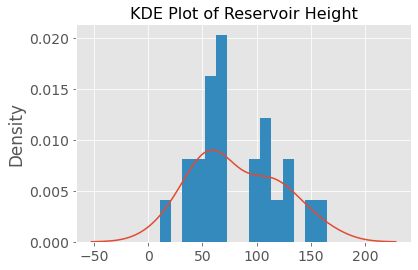

In [160]:
#KDE based on raw data, n=24
x_arr_0, y_arr_0= sns.kdeplot(data=x).get_lines()[0].get_data()
plt.hist(x, bins=15, density=True)
plt.title("KDE Plot of Reservoir Height", fontsize=16)
plt.show()


## Find the Mode of the KDE to use as the Most-Likely Value

In [305]:
# Determine the mode from the KDE and use as an input to the Beta distribution
maxima = x_arr_0[np.argmax([y_arr_0])]
print('Maxima from KDE: ', np.round(maxima,2))

Maxima from KDE:  59.05


## Extract Other Key Statistics from the KDE

In [306]:
# Basic stats from KDE
print('Min', round(np.min(x_arr_0),2))
print('Mean', round(np.mean(x_arr_0),2))
print('Max', round(np.max(x_arr_0),2))     # Use as input to a Beta distribution
print('Count', round(np.size(x_arr_0),2))

Min -52.51
Mean 88.0
Max 228.51
Count 200


## Model a Beta Distribution From the KDE fitted to Murtha and Ross' (2009) Data
- Set the Min value to a Geologic Minimum (10 ft)
- Set the ML to the Maxima from the KDE (59 ft)
- Set the Max to the Maximum value from the KDE (228 ft)

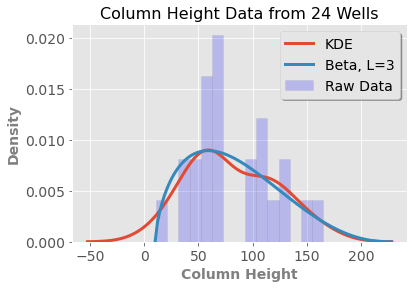

In [433]:
# Create a Beta Distribution

from scipy.stats import beta

# Set Min, Ml, Max and Size parameters
amin=10         # Minimum Value 
bml=maxima      # Most-Likely Value
cmax=228        # Maximum Value
size=10000      # Number of random samples for the distribution

########## Calculate Beta Shape Parameters  #######################
L = 3                     # Dispersion Factor (L) has a significant effect on the outcome, trial and error showed 3 was optimal
a=1+L*(bml-amin)/(cmax-amin)
b=1+L*(cmax-bml)/(cmax-amin)
#############################################################


# Beta Distribution
bx = np.linspace(amin, cmax, 100)
by = beta.pdf(bx, a, b, loc=amin, scale=cmax-amin)
bvals =beta.rvs(a, b, loc=amin, scale=cmax-amin, size=size, random_state=None)

# Plotting 
plt.plot(x_arr_0, y_arr_0, lw=3, label="KDE")
plt.plot(bx, by, lw=3, label="Beta, L=" + str(L))
plt.hist(x, bins=15, density=True, color='b', edgecolor='gray', alpha=.2, label='Raw Data')
plt.legend(shadow=True)
plt.xlabel("Column Height", fontsize=14, fontweight='bold', color='gray')
plt.ylabel("Density", fontsize=14, fontweight='bold', color='gray')
plt.title('Column Height Data from 24 Wells', fontsize=16)
plt.show()


## Compare Descriptive Statistics from the Beta Random Values and Raw Data

In [427]:
print('\n','Stats from Beta/KDE')
my_stats(bvals)
print('\n','Stats from Raw Data')
my_stats(x)


 Stats from Beta/KDE
Descriptive Statistics
mean:     82.7035
sem:      0.4211
median:   77.4794
min:      10.6063
max:      224.5627
stdev:    42.1067
skew:     0.4824
kurt:    -0.4801
p05:      23.7204
p50:      77.4794
p95:      160.2150
Count     10000

 Stats from Raw Data
Descriptive Statistics
mean:     81.5000
sem:      8.1596
median:   69.5000
min:      11.0000
max:      165.0000
stdev:    39.1323
skew:     0.3217
kurt:    -0.7951
p05:      32.1500
p50:      69.5000
p95:      143.3500
Count     24


## Monte Carlo Simulation to Evaluate the Variability in the Mean Value
It is interesting to note that the results of the Monte Carlo simulation produce a Normal Distribution, thanks to the Central Limits Theorum.<br> **The implications is that volumetic inputs of Min-Mean-Max will define a symmetical distribution.**

Error of Mean 33.1

 Mean Value from Monte Carlo
Descriptive Statistics
mean:     83.1281
sem:      0.0848
median:   83.0106
min:      51.6990
max:      117.8555
stdev:    8.4836
skew:     0.0699
kurt:     0.0344
p05:      69.2357
p50:      83.0106
p95:      97.4063
Count     10000


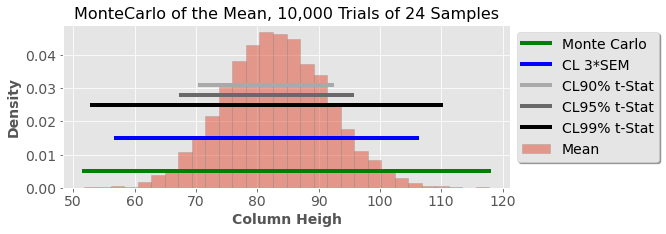

In [428]:
# Monte Carlo simulatin for the range in the Mean or Median
n_trials=10000-1
i=0
size2=24
out=[]

while(i <=n_trials):
    bvals = beta.rvs(a, b, loc=amin, scale=cmax-amin, size=size2, random_state=None)
    m=np.mean(bvals)   # Can use the mean or median value
    se=stats.sem(bvals)
    out.append(m)
    i=i+1

mc_rng = np.linspace(np.min(out), np.max(out), 2)
mc_mean = (np.max(out)-np.min(out))/2
print('Error of Mean', round(mc_mean,1))
print('\n', 'Mean Value from Monte Carlo')
my_stats(out)

# Plot a histogram of the Mean values
fig=plt.subplots(figsize=(8, 3))
plt.hist(out, bins=30, edgecolor='gray', alpha=.5, density=True, label='Mean')
plt.plot(mc_rng, [.005, .005],          lw=4, c='g', label='Monte Carlo')
plt.plot (CL_rng_Murtha, [.015, .015],  lw=4, c='b', label='CL 3*SEM')
plt.plot (CL_rng_Sykes90, [.031, .031], lw=4,  c='darkgray', label='CL90% t-Stat')
plt.plot (CL_rng_Sykes95, [.028, .028], lw=4,  c='dimgray', label='CL95% t-Stat')
plt.plot (CL_rng_Sykes99, [.025, .025], lw=4,  c='k', label='CL99% t-Stat')

plt.title('MonteCarlo of the Mean, 10,000 Trials of 24 Samples', fontsize=16)
plt.xlabel("Column Heigh", fontsize=14, fontweight='bold')
plt.ylabel("Density", fontsize=14, fontweight='bold')
plt.legend(shadow=True, bbox_to_anchor = (1.0, 1.0) )
plt.show()

## Examine Box and Whisker Plots of Beta/KDE Model and Raw Data

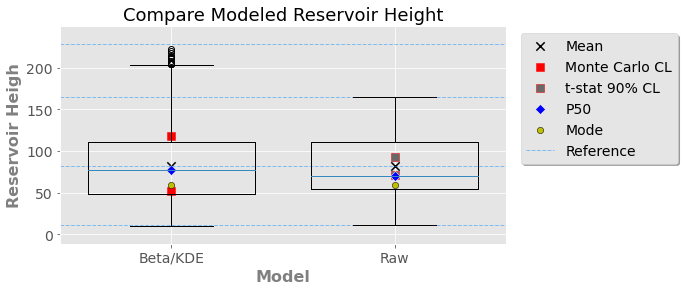

In [450]:
from scipy import stats

list=[1,2]                                # There are 8 Lambdas being compared


figdata=[bvals, x]
fig = plt.figure(figsize=(8,4))
plt.boxplot(figdata, widths=.75) # patch_artist=True


plt.xticks([1, 2], ['Beta/KDE','Raw'])

# Plot the Mean value
plt.scatter(1, np.mean(bvals),  s= 70, c='k', marker='x', label='Mean')
plt.scatter(2, np.mean(x),  s= 70, c='k', marker='x')

# Plot confidence interval for KDE/Beta Model
plt.scatter([1,1], mc_rng,          s= 50, c='r', marker='s', label='Monte Carlo CL')
plt.scatter([2,2], CL_rng_Sykes90,  s= 50, c='dimgray', edgecolor='r', marker='s', label='t-stat 90% CL')

# Plot P50 / median values
plt.scatter(1, np.percentile(bvals,50),  s= 50, c='b', marker='D', edgecolor='w', label='P50')
plt.scatter(2, np.percentile(x,50),      s= 50, c='b', marker='D', edgecolor='w')

# Plot Mode / ML values
plt.scatter(1, maxima, s=40, c='y', marker='o', edgecolor='k', label='Mode')
plt.scatter(2, maxima, s=40, c='y', marker='o', edgecolor='k')

plt.margins(y=.1) # This works to instead of ylim

plt.title("Compare Modeled Reservoir Height", fontsize=18)
plt.xlabel('Model', fontsize =16, fontweight='bold', color='gray')
plt.ylabel('Reservoir Heigh', fontsize =16, fontweight='bold', color='gray')

#plt.figtext(0.5, -.2, "Notes: (1)SEM from raw data, (2)Beta/KDE = 10k samples \n (3)Raw data count=24,",
#            ha="center", fontsize=14, bbox={"facecolor":"orange", "alpha":0.5, "pad":3})

plt.hlines(11,   xmin=.5, xmax=2.5, color='dodgerblue', lw=1, linestyles='--', alpha=.5)
plt.hlines(81.5, xmin=.5, xmax=2.5, color='dodgerblue', lw=1, linestyles='--', alpha=.5)
plt.hlines(165,  xmin=.5, xmax=2.5, color='dodgerblue', lw=1, linestyles='--', alpha=.5)
plt.hlines(228,  xmin=.5, xmax=2.5, color='dodgerblue', lw=1, linestyles='--', alpha=.5, label="Reference")

plt.legend(shadow=True, fontsize=14, bbox_to_anchor=(1.4, 1))
plt.show()